### Problem statement :  Repreated emails analysis Naren Span for July

#### Author : Shivani 
#### Last updated : 04-08-2020

In [1]:
#loading libraries 
import numpy as np
import pandas as pd

#data manipulation 
import re

#importing libraries to map strings 
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# function for calculating similarity index 

def get_ratio(col1 , col2 ,col3):
#     print(col3)
    if col3 != 'nan':
        score_1_2 = fuzz.token_sort_ratio(col1,col2)
        return score_1_2
    else:
        return 'no value'

In [3]:
#reading dataset 
thread_data = pd.read_csv("july_staff.csv")
display(thread_data.head())

,incident_id,resolution_deadline,incident_first_solved_time,incident_last_solved_time,breach_flag,ocr_classification,reopen_flag,email1_thread_type,email2_thread_type,email3_thread_type,...,thread_2,thread_3,thread_4,thread_5,incident_creation_date,csat_incident,csat_flag,issue_type,sub_issue_type,sub_sub_issue_type
0,IN2007010034192797952,2020-07-06 16:13:00,2020-07-12 15:01:52,2020-07-12 15:01:52,1,1CR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,2020-07-12 15:04:04,2020-07-12 15:05:07,NaN,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN
1,IN20070102224785109761,NaN,2020-07-06 11:44:12,2020-07-07 09:44:22,0,OCR,1,Email-Staff Account,Email-Staff Account,NaN,...,2020-07-07 09:45:39,NaN,NaN,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN
2,IN2007010321577282368,NaN,2020-07-29 19:26:02,2020-07-29 19:26:02,0,OCR,0,Email-Staff Account,Email-Staff Account,NaN,...,2020-07-26 19:25:45,NaN,NaN,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN
3,IN2007010544534653465,2020-07-05 19:41:00,2020-07-01 16:43:16,2020-07-06 23:59:31,1,1CR,1,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,2020-07-01 16:42:50,2020-07-01 19:43:29,NaN,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN
4,IN2007010700197110525,NaN,2020-07-28 16:35:46,2020-07-28 16:35:46,0,OCR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,2020-07-28 16:36:23,2020-07-28 16:36:49,NaN,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN


#### Data Summary

In [4]:
thread_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363167 entries, 0 to 363166
Data columns (total 34 columns):
incident_id                   363167 non-null object
resolution_deadline           228697 non-null object
incident_first_solved_time    344217 non-null object
incident_last_solved_time     344217 non-null object
breach_flag                   363167 non-null int64
ocr_classification            363167 non-null object
reopen_flag                   363167 non-null int64
email1_thread_type            363139 non-null object
email2_thread_type            363167 non-null object
email3_thread_type            121852 non-null object
email4_thread_type            51993 non-null object
email5_thread_type            22866 non-null object
email1_agent_id               363139 non-null object
email2_agent_id               363167 non-null object
email3_agent_id               121852 non-null object
email4_agent_id               51993 non-null object
email5_agent_id               22866 non-null o

In [6]:
#loading mapping file 
naren_center = pd.read_excel("C:\\Users\\shivani.singh\\Documents\\Project1-WFM\\Project5 - NLP\\TechM Kolkata Analysis\\HC_Naren_Span.xlsx",  sheet_name="Sheet1")
naren_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768 entries, 0 to 7767
Data columns (total 3 columns):
LDAP ID    7768 non-null object
Channel    7768 non-null object
Site       7768 non-null object
dtypes: object(3)
memory usage: 182.2+ KB


In [7]:
naren_center["Site"].value_counts()

TechM_Noida      2947
TP_Mohali        2802
TechM_Kolkata    1027
SmarterBiz        872
Cogent_Noida      120
Name: Site, dtype: int64

In [8]:
#Storing list of agent ids under Naren's span
data_w_sitename1 = thread_data.merge(naren_center, left_on= ['email2_agent_id'], right_on= ['LDAP ID'], how = "left")
data_w_sitename1.head()

,incident_id,resolution_deadline,incident_first_solved_time,incident_last_solved_time,breach_flag,ocr_classification,reopen_flag,email1_thread_type,email2_thread_type,email3_thread_type,...,thread_5,incident_creation_date,csat_incident,csat_flag,issue_type,sub_issue_type,sub_sub_issue_type,LDAP ID,Channel,Site
0,IN2007010034192797952,2020-07-06 16:13:00,2020-07-12 15:01:52,2020-07-12 15:01:52,1,1CR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN20070102224785109761,NaN,2020-07-06 11:44:12,2020-07-07 09:44:22,0,OCR,1,Email-Staff Account,Email-Staff Account,NaN,...,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN,techmnq.1689440,CX_Voice,TechM_Noida
2,IN2007010321577282368,NaN,2020-07-29 19:26:02,2020-07-29 19:26:02,0,OCR,0,Email-Staff Account,Email-Staff Account,NaN,...,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN,techmnflex19.8335,CX_Voice,TechM_Noida
3,IN2007010544534653465,2020-07-05 19:41:00,2020-07-01 16:43:16,2020-07-06 23:59:31,1,1CR,1,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN,techmn.1716135,CX_Email,TechM_Noida
4,IN2007010700197110525,NaN,2020-07-28 16:35:46,2020-07-28 16:35:46,0,OCR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,2020-07-01 00:00:00,0,NaN,NaN,NaN,NaN,techmn.1734781,CX_Voice,TechM_Noida


In [9]:
data_w_sitename1.rename(columns={'LDAP ID': 'LDAP ID2', 'Channel': 'Channel2', 'Site' : 'Site2'}, inplace=True)

In [11]:
data_w_sitename2 = data_w_sitename1.merge(naren_center, left_on= ['email3_agent_id'], right_on= ['LDAP ID'], how = "left")
data_w_sitename2.rename(columns={'LDAP ID': 'LDAP ID3', 'Channel': 'Channel3', 'Site' : 'Site3'}, inplace=True)

In [12]:
data_w_sitename3 = data_w_sitename2.merge(naren_center, left_on= ['email4_agent_id'], right_on= ['LDAP ID'], how = "left")
data_w_sitename3.rename(columns={'LDAP ID': 'LDAP ID4', 'Channel': 'Channel4', 'Site' : 'Site4'}, inplace=True)

In [13]:
data_w_sitename4 = data_w_sitename3.merge(naren_center, left_on= ['email5_agent_id'], right_on= ['LDAP ID'], how = "left")
data_w_sitename4.rename(columns={'LDAP ID': 'LDAP ID5', 'Channel': 'Channel5', 'Site' : 'Site5'}, inplace=True)

In [14]:
data_w_sitename4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363167 entries, 0 to 363166
Data columns (total 46 columns):
incident_id                   363167 non-null object
resolution_deadline           228697 non-null object
incident_first_solved_time    344217 non-null object
incident_last_solved_time     344217 non-null object
breach_flag                   363167 non-null int64
ocr_classification            363167 non-null object
reopen_flag                   363167 non-null int64
email1_thread_type            363139 non-null object
email2_thread_type            363167 non-null object
email3_thread_type            121852 non-null object
email4_thread_type            51993 non-null object
email5_thread_type            22866 non-null object
email1_agent_id               363139 non-null object
email2_agent_id               363167 non-null object
email3_agent_id               121852 non-null object
email4_agent_id               51993 non-null object
email5_agent_id               22866 non-null o

#### Manipulating data 

In [15]:
df = data_w_sitename4.copy()

In [16]:
k = 1  #change everytime with the new column 

col_list = ['email_1',
 'email_2',
 'email_3',
 'email_4',
 'email_5']

for name in col_list:    
        df["email_new_" + str(k)] = df[str(name)].str.replace('[^a-zA-Z0-9]+', '').str.lower()
        print(name)
        k = k + 1 

email_1
email_2
email_3
email_4
email_5


In [17]:
display(df.head())

,incident_id,resolution_deadline,incident_first_solved_time,incident_last_solved_time,breach_flag,ocr_classification,reopen_flag,email1_thread_type,email2_thread_type,email3_thread_type,...,Channel4,Site4,LDAP ID5,Channel5,Site5,email_new_1,email_new_2,email_new_3,email_new_4,email_new_5
0,IN2007010034192797952,2020-07-06 16:13:00,2020-07-12 15:01:52,2020-07-12 15:01:52,1,1CR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,NaN,NaN,NaN,NaN,hisuhanithankyouforwritinginwearesorrytoletyou...,hisuhaniwearewritingtoyouaboutyourreturnreques...,messagehiwearewritingtoyouaboutyourreturnreque...,NaN,NaN
1,IN20070102224785109761,NaN,2020-07-06 11:44:12,2020-07-07 09:44:22,0,OCR,1,Email-Staff Account,Email-Staff Account,NaN,...,NaN,NaN,NaN,NaN,NaN,messagerefundupdatethanksforreachingussellerha...,messagerefundupdatethanksforreachingussellerha...,NaN,NaN,NaN
2,IN2007010321577282368,NaN,2020-07-29 19:26:02,2020-07-29 19:26:02,0,OCR,0,Email-Staff Account,Email-Staff Account,NaN,...,NaN,NaN,NaN,NaN,NaN,himanojthanksforwritinginlookslikeyouvesentusa...,himanojwerewritingtoyouincontinuationtoourearl...,NaN,NaN,NaN
3,IN2007010544534653465,2020-07-05 19:41:00,2020-07-01 16:43:16,2020-07-06 23:59:31,1,1CR,1,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,NaN,NaN,NaN,NaN,hitejinderthanksforwritinginweunderstandyourco...,hitejinderthankyouforwritinginweunderstandyour...,hitejinderthankyouforwritinginweunderstandyour...,NaN,NaN
4,IN2007010700197110525,NaN,2020-07-28 16:35:46,2020-07-28 16:35:46,0,OCR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,NaN,NaN,NaN,NaN,hidikshathanksforwritinginwearesorrythatitstak...,hidikshawerewritingtoletyouknowthatweareclosin...,messageupdatethanksforreachingusupdateregardin...,NaN,NaN


#### Calculating Levenshtein ratio for email threads

In [18]:
col_list = ['email_new_1',
 'email_new_2',
 'email_new_3',
 'email_new_4',
 'email_new_5']

In [19]:
i = 1
j = 1

null_col_list = ['LDAP ID2','LDAP ID3','LDAP ID4','LDAP ID5']


for name, agent in zip(col_list,null_col_list): 
    try:
        df["new_score_" + str(j)] = df.apply(lambda x: get_ratio(x[str(name)], x[str(col_list[i])],x[str(agent)]), axis=1)        
        print(name, col_list[i])
        i = i + 1
        j = j + 1
        
    except:
        print("error")
 

email_new_1 email_new_2
email_new_2 email_new_3
email_new_3 email_new_4
email_new_4 email_new_5


In [20]:
# Applying the fuzzy logic on thread data 
display(df.head())

,incident_id,resolution_deadline,incident_first_solved_time,incident_last_solved_time,breach_flag,ocr_classification,reopen_flag,email1_thread_type,email2_thread_type,email3_thread_type,...,Site5,email_new_1,email_new_2,email_new_3,email_new_4,email_new_5,new_score_1,new_score_2,new_score_3,new_score_4
0,IN2007010034192797952,2020-07-06 16:13:00,2020-07-12 15:01:52,2020-07-12 15:01:52,1,1CR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,hisuhanithankyouforwritinginwearesorrytoletyou...,hisuhaniwearewritingtoyouaboutyourreturnreques...,messagehiwearewritingtoyouaboutyourreturnreque...,NaN,NaN,11,71,2,100
1,IN20070102224785109761,NaN,2020-07-06 11:44:12,2020-07-07 09:44:22,0,OCR,1,Email-Staff Account,Email-Staff Account,NaN,...,NaN,messagerefundupdatethanksforreachingussellerha...,messagerefundupdatethanksforreachingussellerha...,NaN,NaN,NaN,32,2,100,100
2,IN2007010321577282368,NaN,2020-07-29 19:26:02,2020-07-29 19:26:02,0,OCR,0,Email-Staff Account,Email-Staff Account,NaN,...,NaN,himanojthanksforwritinginlookslikeyouvesentusa...,himanojwerewritingtoyouincontinuationtoourearl...,NaN,NaN,NaN,10,2,100,100
3,IN2007010544534653465,2020-07-05 19:41:00,2020-07-01 16:43:16,2020-07-06 23:59:31,1,1CR,1,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,hitejinderthanksforwritinginweunderstandyourco...,hitejinderthankyouforwritinginweunderstandyour...,hitejinderthankyouforwritinginweunderstandyour...,NaN,NaN,12,22,2,100
4,IN2007010700197110525,NaN,2020-07-28 16:35:46,2020-07-28 16:35:46,0,OCR,0,Email-Staff Account,Email-Staff Account,Email-Staff Account,...,NaN,hidikshathanksforwritinginwearesorrythatitstak...,hidikshawerewritingtoletyouknowthatweareclosin...,messageupdatethanksforreachingusupdateregardin...,NaN,NaN,2,11,2,100


In [ ]:
# df.to_csv("data_naren_center_Scores.csv", index = False)

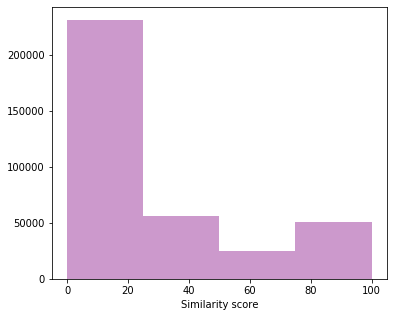

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (6,5))
sns.distplot( df["new_score_1"].sort_values(), bins= 4 , kde = False, rug = False, 
             axlabel = "Similarity score", color= "purple")


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363167 entries, 0 to 363166
Data columns (total 55 columns):
incident_id                   363167 non-null object
resolution_deadline           228697 non-null object
incident_first_solved_time    344217 non-null object
incident_last_solved_time     344217 non-null object
breach_flag                   363167 non-null int64
ocr_classification            363167 non-null object
reopen_flag                   363167 non-null int64
email1_thread_type            363139 non-null object
email2_thread_type            363167 non-null object
email3_thread_type            121852 non-null object
email4_thread_type            51993 non-null object
email5_thread_type            22866 non-null object
email1_agent_id               363139 non-null object
email2_agent_id               363167 non-null object
email3_agent_id               121852 non-null object
email4_agent_id               51993 non-null object
email5_agent_id               22866 non-null o

### Adding columns for filters 

In [26]:
df_n = df.copy()

In [27]:
df_n.drop(['email_new_1','email_new_2','email_new_3','email_new_4','email_new_5'], inplace = True, axis = 1)

In [35]:
#adding week column

i = 1

col_list = ['thread_1','thread_2','thread_3','thread_4','thread_5']

for col_name in col_list:
    df_n["thread"+str(i)+"_week"] = pd.to_datetime(df_n[str(col_name)]).dt.strftime("%U")
    i = i + 1


In [37]:
df_n["thread5_week"].unique()

array(['NaT', '28', '29', '26', '27', '30', '31', '02', '03'],
      dtype=object)

In [40]:
df_n_july = df_n[pd.to_datetime(df_n["thread_2"]) >= "2020-07-01"]

In [42]:
df_n_july["thread_2"].min()

'2020-07-01 09:03:20'

In [48]:
#adding scoring buckets 
i = 1
col_list = ['new_score_1','new_score_2','new_score_3','new_score_4']

for col_name in col_list:
    df_n_july["score_bucket"+str(i)] = np.where(df_n_july[str(col_name)] < 25,"[0-24]",np.where(df_n_july[str(col_name)]<50,"[25-49]",
                                                                                        np.where(df_n_july[str(col_name)]<75,"[50-74]","[75-100]")))
    
    i = i+1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [49]:
df_n_july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363139 entries, 0 to 363166
Data columns (total 59 columns):
incident_id                   363139 non-null object
resolution_deadline           228678 non-null object
incident_first_solved_time    344189 non-null object
incident_last_solved_time     344189 non-null object
breach_flag                   363139 non-null int64
ocr_classification            363139 non-null object
reopen_flag                   363139 non-null int64
email1_thread_type            363139 non-null object
email2_thread_type            363139 non-null object
email3_thread_type            121843 non-null object
email4_thread_type            51990 non-null object
email5_thread_type            22864 non-null object
email1_agent_id               363139 non-null object
email2_agent_id               363139 non-null object
email3_agent_id               121843 non-null object
email4_agent_id               51990 non-null object
email5_agent_id               22864 non-null o

In [51]:
df_n_july["score_bucket2"].unique()

array(['[50-74]', '[0-24]', '[25-49]', '[75-100]'], dtype=object)

In [54]:
df_n_july.to_excel("Data_July_Mapped.xlsx", index = False)

In [ ]:
# ax = a["score3_perc"].plot(kind='bar', color = "purple")
# ax.set_title('SimilarityIndex Distribution')
# ax.set_xlabel('Similarity Score')
# ax.set_ylabel('%of total emails')

# x_labels = a["index"].tolist()
# ax.set_xticklabels(x_labels)

# rects = ax.patches

# # Make some labels.
# labels = ["%s" % i for i in a["label"]]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')

In [ ]:
# # creating the bar plot where email 1 and email 2 are handled by kolkata  
# plt.figure(figsize= (7,5))
# plt.bar(a["index"].sort_values(),a["score1_perc"], color ='maroon',  width = 0.4) 
# plt.show()